<a href="https://colab.research.google.com/github/ikrarmuhamad/Image-Detection/blob/main/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import matplotlib.image as mpimg
import tensorflow as tf
import random
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [3]:
# Get the dataset from github
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'

--2023-09-29 09:50:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 108.177.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  33.8MB/s    in 3.1s    

2023-09-29 09:50:38 (33.8 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



# Data Overview

In [4]:
import zipfile

# Read the data and extract file Zip
zip = zipfile.ZipFile("pizza_steak.zip", "r")
zip.extractall()

In [5]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/train

pizza  steak


In [7]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [8]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
img = random.sample(os.listdir('pizza_steak/train/steak'), 1)
img[0]

'1598345.jpg'

In [11]:
def view_image(target_folder, type_target, target_name):
  folder = target_folder + '/' + type_target + '/' + target_name
  img = random.sample(os.listdir(folder), 1)
  image = mpimg.imread(folder + '/' + img[0])
  plt.imshow(image)
  plt.title(target_name)
  plt.axis('off')
  print(f"Image shape: {image.shape}")

Image shape: (512, 384, 3)


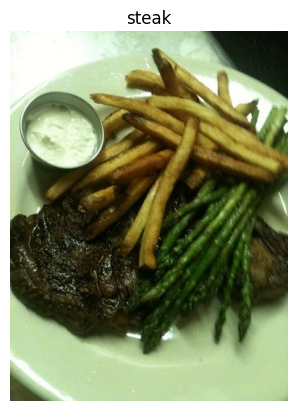

In [12]:
# Overview the random image
view_image('pizza_steak', 'train' ,'steak')

# Preprocessing Data Image

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'pizza_steak/train/'
test_data_dir = 'pizza_steak/test/'

In [14]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_data_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_data_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling

## CNN

In [16]:
from tensorflow import keras

In [17]:
# Create model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 64,
                        kernel_size = 3,
                        strides = 1,
                        padding = 'valid',
                        input_shape = (224, 224, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(64, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Fit the model
history = model.fit(train_data,
                    epochs = 5,
                    steps_per_epoch=len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 30s 288ms/step - loss: 0.6102 - accuracy: 0.6580 - val_loss: 0.4600 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4578 - accuracy: 0.8060 - val_loss: 0.3663 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 7s 158ms/step - loss: 0.4045 - accuracy: 0.8267 - val_loss: 0.3102 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3680 - accuracy: 0.8553 - val_loss: 0.3300 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3409 - accuracy: 0.8600 - val_loss: 0.2701 - val_accuracy: 0.8980


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [19]:
# Evaluate the model
model.evaluate(valid_data)

16/16 [==============================] - 1s 88ms/step - loss: 0.2701 - accuracy: 0.8980


[0.2700635492801666, 0.8980000019073486]

Text(0.5, 0, 'Epochs')

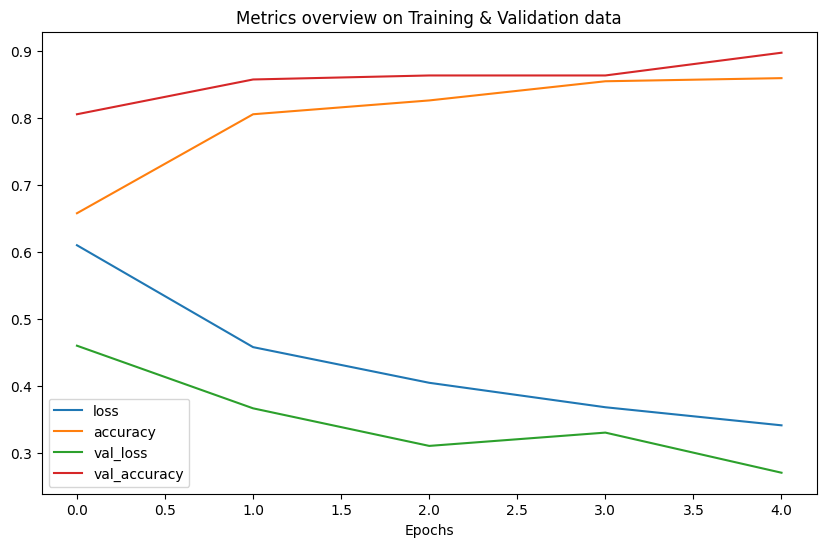

In [22]:
# Evaluate the metrcis Accuracy score on training & validation data

import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))
plt.title('Metrics overview on Training & Validation data')
plt.xlabel('Epochs')

## Tes data on random image from google

In [23]:
!wget 'https://bakeitwithlove.com/wp-content/uploads/2022/06/steak-marinade-sq.jpg'

--2023-09-29 09:55:46--  https://bakeitwithlove.com/wp-content/uploads/2022/06/steak-marinade-sq.jpg
Resolving bakeitwithlove.com (bakeitwithlove.com)... 104.18.0.2, 104.18.1.2, 2606:4700::6812:2, ...
Connecting to bakeitwithlove.com (bakeitwithlove.com)|104.18.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218427 (213K) [image/jpeg]
Saving to: ‘steak-marinade-sq.jpg’

steak-marinade-sq.j 100%[===================>] 213.31K  --.-KB/s    in 0.01s   

2023-09-29 09:55:46 (17.3 MB/s) - ‘steak-marinade-sq.jpg’ saved [218427/218427]



(-0.5, 1199.5, 1199.5, -0.5)

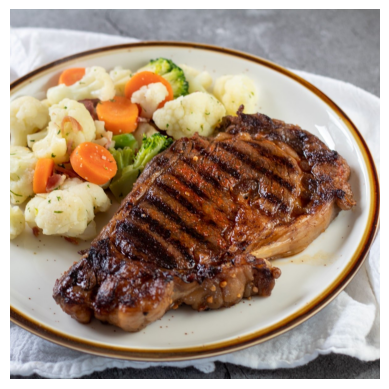

In [24]:
steak = mpimg.imread('steak-marinade-sq.jpg')
plt.imshow(steak)
plt.axis('off')

In [25]:
steak.shape

(1200, 1200, 3)

In [26]:
def load_prep(file, shape = 224):
  img = tf.io.read_file(file)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [shape, shape])
  img = img/255.
  return img

In [27]:
tes = load_prep('steak-marinade-sq.jpg')

In [28]:
preds = model.predict(tf.expand_dims(tes, axis = 0))

1/1 [==============================] - 0s 323ms/step


In [29]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [30]:
pred = class_names[int(tf.round(preds)[0][0])]
pred

'steak'

In [33]:
# Create function to show the prediction image with the label class

def plot_pred(model, file, class_names):
  from PIL import Image
  img = Image.open(file)
  img.save(file, 'JPEG')
  img = load_prep(file)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  clas = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f'Prediction : {clas}')
  plt.axis('off')

1/1 [==============================] - 0s 19ms/step


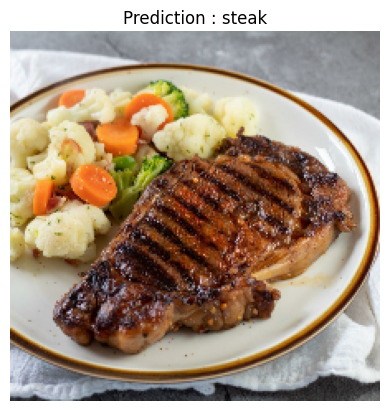

In [34]:
plot_pred(model, 'steak-marinade-sq.jpg', class_names)

In [35]:
# Random image from other image
!wget 'https://www.foodandwine.com/thmb/MT-PmMm_-6BVcPl8tbcnybIf7Vk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg'

--2023-09-29 09:57:30--  https://www.foodandwine.com/thmb/MT-PmMm_-6BVcPl8tbcnybIf7Vk=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg
Resolving www.foodandwine.com (www.foodandwine.com)... 151.101.2.137, 151.101.66.137, 151.101.130.137, ...
Connecting to www.foodandwine.com (www.foodandwine.com)|151.101.2.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171691 (168K) [image/jpeg]
Saving to: ‘reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg’

reverse-sear-steak- 100%[===================>] 167.67K  --.-KB/s    in 0.01s   

2023-09-29 09:57:30 (11.4 MB/s) - ‘reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg’ saved [171691/171691]



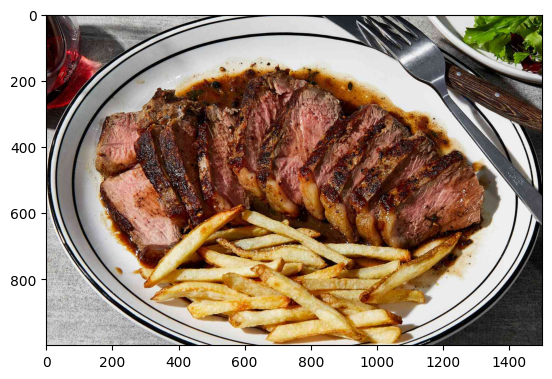

In [36]:
# Overview the image

tes = mpimg.imread('reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg')
plt.imshow(tes)

1/1 [==============================] - 0s 25ms/step


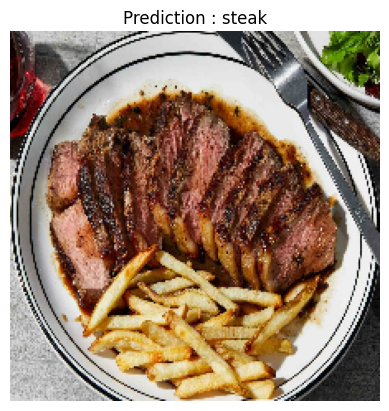

In [37]:
plot_pred(model, 'reverse-sear-steak-FT-RECIPE0222-5c6f8d9a037a4ca2b170adea0529ba7a.jpg', class_names)